# 선형회귀 데이터 로딩(보스턴 주택가격 데이터)

In [1]:
from sklearn.datasets import load_boston
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = load_boston()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i

In [3]:
data.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])

In [4]:
X = data.data
y = data.target

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,
                                                random_state=722)

In [7]:
X_train.shape, y_train.shape

((404, 13), (404,))

In [8]:
X_test.shape, y_test.shape

((102, 13), (102,))

In [9]:
# 선형회귀모델
from sklearn.linear_model import LinearRegression

In [10]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [11]:
# 학습된 가중치와 절편 확인
print("가중치 : ", model.coef_)
print("절편 : ", model.intercept_)

가중치 :  [-1.18313515e-01  5.20521053e-02  1.76355388e-02  4.11554414e+00
 -2.01952839e+01  2.93408084e+00  1.01479948e-02 -1.56497280e+00
  3.16556945e-01 -1.25687293e-02 -1.01868234e+00  6.75071633e-03
 -5.73138231e-01]
절편 :  45.72482696295275


In [12]:
# 모델평가
model.score(X_test,y_test) # R square 점수

0.7454536557439619

In [13]:
# 다른 평가지표 사용
from sklearn.metrics import mean_absolute_error # MAE
from sklearn.metrics import mean_squared_error  # MSE

In [14]:
pre = model.predict(X_test)   #예측값 생성
print("MAE : ", mean_absolute_error(y_test,pre))
print("MSE : ", mean_squared_error(y_test,pre))

MAE :  3.028568457448007
MSE :  17.925235768942024


### 선형모델의 학습 원리
1. 선형모델은 최적의 가중치(w)와 절편(b)를 선택하기 위해 MSE(평균제곱오차)를 이용해 각 가설의 적합성을 판단한다.
2. 최적의 가중치(w)와 절편(b)를 만들기 위해서 2가지 방식을 활용한다.
   - 해석적 방법(Ordinary Least Squares) -> LinearRegression 클래스로 구현됨
   - 경사하강법(Gradient Descent Algorithm) -> SGDRegressir 클래스로 구현됨
     - 초기 가중치로부터 기울기 값을 조금씩 수정해서 찾아가는 방식
     - 기울기가 낮아지는 방향으로 계속 업데이트하는 공식

#### 가중치변화에 따른 MSE변화 그래프를 그려보자

In [15]:
# 성젝데이터 생성
data = pd.DataFrame([[2,20],[4,40],[8,80],[9,90]],
                   index=['해도','예호','형','병관'],
                   columns=['공부시간', '성적점수'])

In [16]:
data

,공부시간,성적점수
해도,2,20
예호,4,40
형,8,80
병관,9,90


##### MSE함수 생성

In [17]:
# 문제, 정답,가중치를 매개변수로 받는다.
def MSE(X,y,w):
    # 예측값 생성
    y_pre = w*X + 0
    #실제값과 예측값의 차이의 제곱 평균
    error = y - y_pre # 오차
    return(error ** 2).mean() # 평균 제곱오차

In [18]:
MSE(data['공부시간'], data['성적점수'], 10) # 결과값이 0이 나와야헌다.

0.0

#### 그래프 그리기

In [19]:
# 변화하는 가중치(w) 생성
weights = np.linspace(0,20)
weights

array([ 0.        ,  0.40816327,  0.81632653,  1.2244898 ,  1.63265306,
        2.04081633,  2.44897959,  2.85714286,  3.26530612,  3.67346939,
        4.08163265,  4.48979592,  4.89795918,  5.30612245,  5.71428571,
        6.12244898,  6.53061224,  6.93877551,  7.34693878,  7.75510204,
        8.16326531,  8.57142857,  8.97959184,  9.3877551 ,  9.79591837,
       10.20408163, 10.6122449 , 11.02040816, 11.42857143, 11.83673469,
       12.24489796, 12.65306122, 13.06122449, 13.46938776, 13.87755102,
       14.28571429, 14.69387755, 15.10204082, 15.51020408, 15.91836735,
       16.32653061, 16.73469388, 17.14285714, 17.55102041, 17.95918367,
       18.36734694, 18.7755102 , 19.18367347, 19.59183673, 20.        ])

In [20]:
mse_list = []
for w in weights:
    mse_list.append(MSE(data['공부시간'], data['성적점수'], w))
    
mse_list

[4125.0,
 3795.1374427321953,
 3479.019158683882,
 3176.6451478550603,
 2888.015410245731,
 2613.1299458558933,
 2351.9887546855475,
 2104.5918367346935,
 1870.939192003332,
 1651.0308204914622,
 1444.8667221990836,
 1252.4468971261972,
 1073.771345272803,
 908.8400666389006,
 757.6530612244896,
 620.2103290295709,
 496.5118700541441,
 386.5576842982092,
 290.3477717617659,
 207.88213244481454,
 139.1607663473552,
 84.1836734693878,
 42.950853810912015,
 15.46230737192834,
 1.718034152436478,
 1.718034152436478,
 15.46230737192834,
 42.95085381091215,
 84.1836734693878,
 139.1607663473552,
 207.88213244481489,
 290.347771761766,
 386.5576842982092,
 496.5118700541442,
 620.2103290295709,
 757.6530612244901,
 908.8400666389006,
 1073.7713452728026,
 1252.4468971261979,
 1444.8667221990838,
 1651.0308204914627,
 1870.939192003332,
 2104.5918367346935,
 2351.988754685547,
 2613.129945855895,
 2888.015410245732,
 3176.6451478550607,
 3479.019158683883,
 3795.1374427321957,
 4125.0]

<function matplotlib.pyplot.show(close=None, block=None)>

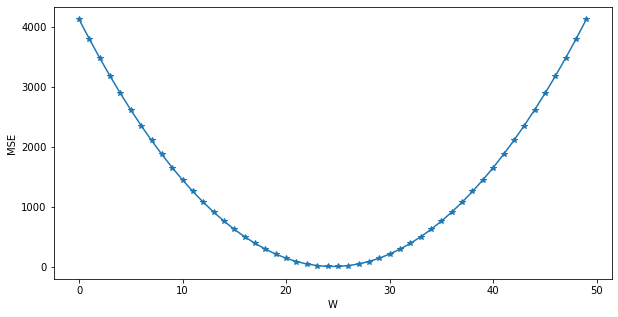

In [21]:
plt.figure(figsize=(10,5))
plt.plot( mse_list, marker='*')
plt.ylabel("MSE")
plt.xlabel("W")
plt.show

### 경사하강법으로 구현된 SGDRegressor를 사용해보자

In [22]:
from sklearn.linear_model import SGDRegressor

In [23]:
sgd_model = SGDRegressor(eta0=0.001, # 학습률
                        max_iter=5000, # 반복횟수(가중치 업데이트 횟수)
                        epsilon=0.001, # 최소 오차 기준값
                        n_iter_no_change=15, # 업데이트시 오차가 변경되지 않는걸 허용하는 횟수
                        verbose=1) 

In [24]:
sgd_model.fit(data[['공부시간']], data['성적점수'])

-- Epoch 1
Norm: 1.19, NNZs: 1, Bias: 0.172587, T: 4, Avg. loss: 1902.064818
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 2.04, NNZs: 1, Bias: 0.293865, T: 8, Avg. loss: 1496.003802
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 2.73, NNZs: 1, Bias: 0.391502, T: 12, Avg. loss: 1222.558443
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 3.32, NNZs: 1, Bias: 0.473857, T: 16, Avg. loss: 1018.584795
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 3.83, NNZs: 1, Bias: 0.545088, T: 20, Avg. loss: 859.401225
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 4.28, NNZs: 1, Bias: 0.607697, T: 24, Avg. loss: 731.789642
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 4.67, NNZs: 1, Bias: 0.663352, T: 28, Avg. loss: 627.600367
Total training time: 0.00 seconds.
-- Epoch 8
Norm: 5.03, NNZs: 1, Bias: 0.713248, T: 32, Avg. loss: 541.380743
Total training time: 0.00 seconds.
-- Epoch 9
Norm: 5.35, NNZs: 1, Bias: 0.758277, T: 36, Avg. loss: 469.281461
Total training time: 0.00

SGDRegressor(epsilon=0.001, eta0=0.001, max_iter=5000, n_iter_no_change=15,
             verbose=1)

In [25]:
print("가중치 : ", sgd_model.coef_)
print("절편 : ", sgd_model.intercept_)

가중치 :  [9.79753564]
절편 :  [1.34638064]


In [26]:
sgd_model.predict([[7],[5]])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SGDRegressor was fitted with feature names
  warnings.warn(


array([69.92913014, 50.33405886])

### 다항회귀
- 선형 모델의 수식에서 입력특성에 2차항이 포함된 경우
- 고차항이 포함되면 데이터의 특성을 더 fit하게 맞출 수 있어 성능 개선의 여지가 있다.

In [27]:
boston = load_boston()
boston.keys()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])

In [28]:
data = pd.DataFrame(boston.data, columns=boston.feature_names)

In [29]:
X_train,X_test,y_train,y_test = train_test_split(data, boston.target,
                                                random_state=726)

<function matplotlib.pyplot.show(close=None, block=None)>

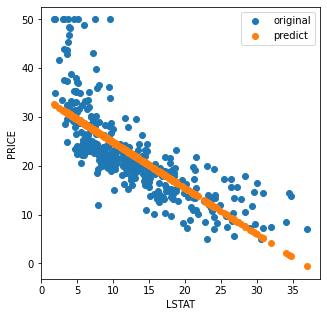

In [30]:
plt.figure(figsize=(5,5)) #가로,세로 크기
plt.scatter(X_train['LSTAT'], y_train, label='original')

# 선형모델 학습
LSTAT_model = LinearRegression()
LSTAT_model.fit(X_train[['LSTAT']], y_train)
# 선형모델의 예측결과 확인
pre = LSTAT_model.predict(X_train[['LSTAT']])
plt.scatter(X_train[['LSTAT']],pre, label='predict')

plt.legend() #범례
plt.xlabel('LSTAT')
plt.ylabel('PRICE')
plt.show

## 다항회귀 구현하기
1. 특성확장을 통해서 다항식을 만들어준다.
2. sklearn의 PolynomialFeatures를 이용한다.

In [31]:
# 특성확장
X_train['LSTAT x LSTAT'] = X_train['LSTAT'] * X_train['LSTAT']

In [32]:
# 모델학습
LSTAT_model2 = LinearRegression()
LSTAT_model2.fit(X_train[['LSTAT','LSTAT x LSTAT']], y_train)
# 모델예측
pre2 = LSTAT_model2.predict(X_train[['LSTAT','LSTAT x LSTAT']])

<function matplotlib.pyplot.show(close=None, block=None)>

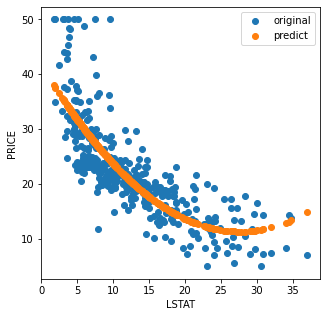

In [33]:
plt.figure(figsize=(5,5))
plt.scatter(X_train['LSTAT'], y_train, label='original') #오리지날 데이터
plt.scatter(X_train['LSTAT'], pre2, label='predict') # 다항회귀 결과

plt.legend() #범례
plt.xlabel('LSTAT')
plt.ylabel('PRICE')
plt.show